<a href="https://colab.research.google.com/github/shilpeemaitra/Lab/blob/main/2348557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #creating informative and attractive statistical graphics and data visualizations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2



1.   LabelEncoder is used for converting categorical labels (text-based) into numerical labels (integer-based) so that machine learning algorithms can work with them. It assigns a unique integer to each category in the label column.
2.   The StandardScaler is a preprocessing technique used for standardizing or scaling features in your dataset. It transforms the data such that it has a mean of 0 and a standard deviation of 1, which can help improve the performance of some machine learning algorithms that are sensitive to the scale of features.
3. The MinMaxScaler is another preprocessing technique used for scaling features. It scales the features to a specified range, between 0 and 1.
4. chi2 is used when you have a classification problem with categorical features and want to determine the independence between each feature and the target variable



In [21]:
data=pd.read_csv('/content/2015.csv')
# uploading the csv
data.head()
# displaying the top values of the table

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [22]:
data.info()
# to find out the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [23]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [24]:
data.describe()
# exploring the dataset by checking its min max values etc

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [25]:
#Checking for null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [26]:
#calculating covariance between Economy, family and health
Z=data[['Economy (GDP per Capita)','Family','Health (Life Expectancy)']]
Z.cov()

,Economy (GDP per Capita),Family,Health (Life Expectancy)
Economy (GDP per Capita),0.162506,0.070852,0.081323
Family,0.070852,0.074185,0.035741
Health (Life Expectancy),0.081323,0.035741,0.061047


<Axes: >

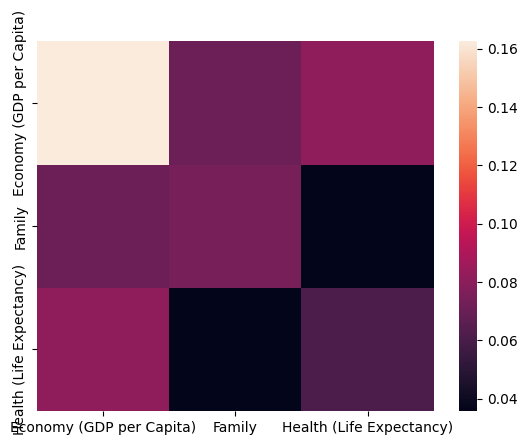

In [27]:
#visualising the covariance matrix using heatmap
sns.heatmap(Z.cov())

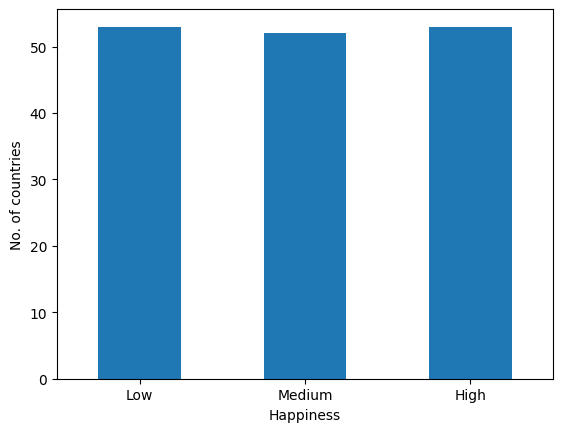

In [28]:
#Creating bins based on happiness score
data['bins']=pd.qcut(data['Happiness Score'],q=3)
data['bins'].value_counts(sort=False).plot(kind='bar',rot=0)
plt.xlabel("Happiness")
plt.ylabel("No. of countries")
plt.xticks([0,1,2],['Low','Medium','High'])
plt.show()

In [29]:
#Converting region's values to numerical
le=LabelEncoder()
data['Region']=le.fit_transform(data['Region'])
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,bins
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,"(5.87, 7.587]"
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,"(5.87, 7.587]"
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,"(5.87, 7.587]"
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,"(5.87, 7.587]"
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,"(5.87, 7.587]"


In [30]:
#standardising  Economy
sc=StandardScaler()
data['Economy (GDP per Capita)']=sc.fit_transform(data[['Economy (GDP per Capita)']])
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,bins
0,Switzerland,9,1,7.587,0.03411,1.369621,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,"(5.87, 7.587]"
1,Iceland,9,2,7.561,0.04884,1.135226,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,"(5.87, 7.587]"
2,Denmark,9,3,7.527,0.03328,1.192861,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,"(5.87, 7.587]"
3,Norway,9,4,7.522,0.03880,1.525130,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,"(5.87, 7.587]"
4,Canada,5,5,7.427,0.03553,1.194876,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,"(5.87, 7.587]"


<Axes: ylabel='Frequency'>

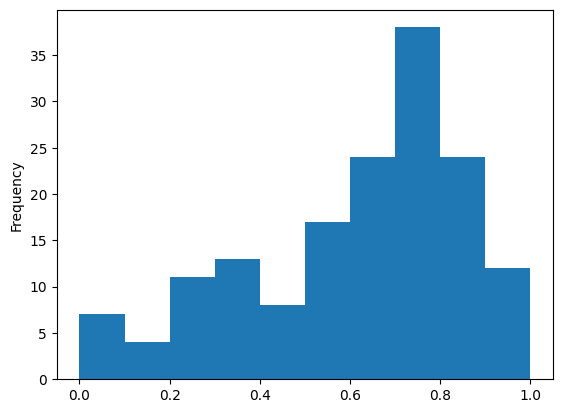

In [31]:
#Normalizing Health
mm=MinMaxScaler()
data['Health (Life Expectancy)']=mm.fit_transform(data[['Health (Life Expectancy)']])
data['Health (Life Expectancy)'].plot(kind='hist')

In [32]:
#Testing association between region and happiness rank
X=data[['Region']]
Y=data['Happiness Rank']
chi_score=chi2(X,Y)
chi_values=pd.Series(chi_score[0])
p_value=pd.Series(chi_score[1])
p_value

0    1.702588e-08
dtype: float64

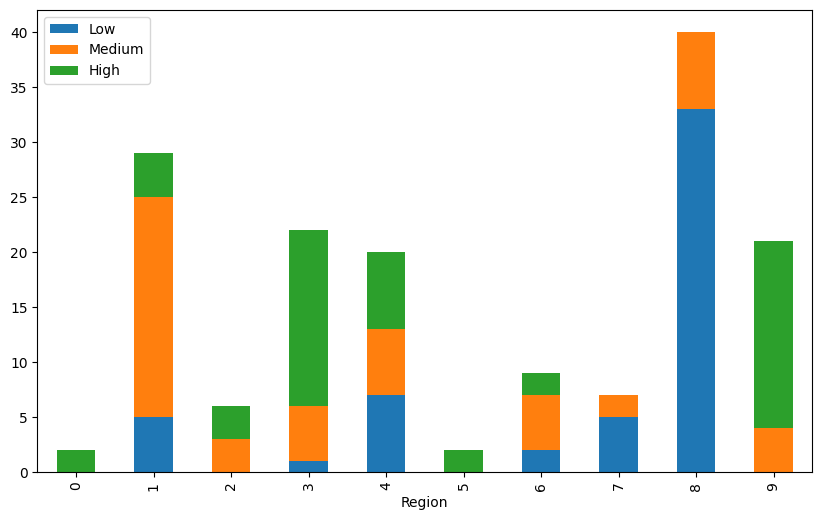

In [33]:
#stacked bar graph showing distribution of region by happiness score
data.groupby(['Region', 'bins']).count()['Happiness Rank'].unstack().plot(kind='bar', stacked=True,figsize=(10,6))
plt.legend(labels=['Low', 'Medium','High'])

<ipython-input-34-9652175b1f4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

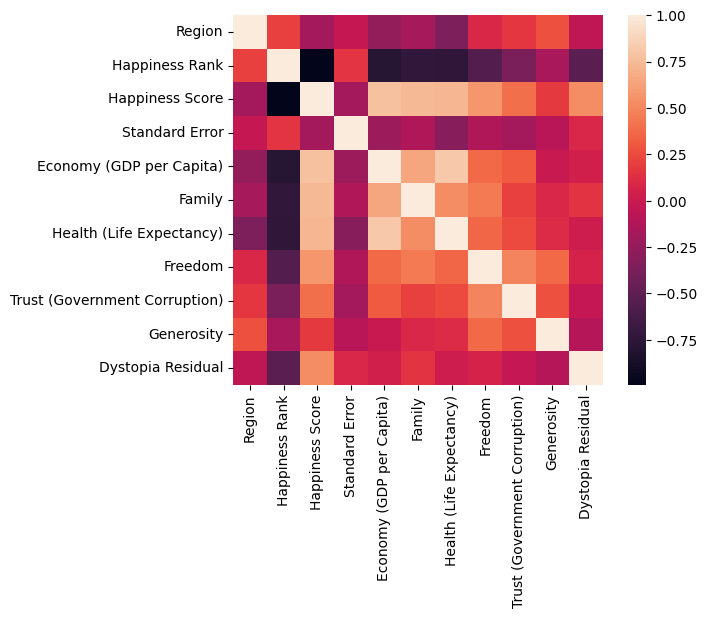

In [34]:
corrmat = data.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)


there are no missing values.

●	Create bins for the 'Happiness Score' column to categorize countries into 'Low Happiness,' 'Medium Happiness,' and 'High Happiness' groups